In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

# 필요없는 경고창 무시
warnings.simplefilter("ignore")

# 한글폰트
import matplotlib.font_manager as fonm
plt.rc('font', family='Malgun Gothic') # For Windows

# 한글 단어 빈도분석
from konlpy.tag import Kkma
kkma = Kkma()

#워드 클라우드
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
import numpy as np
import re

In [2]:
df = pd.read_excel('final_data/교통약자다발지점_사고지표_세부정보_병합.xlsx')

In [3]:
df['지점명'].to_csv('wordcloud_data/accident_place.txt', sep='\n', encoding='utf-8-sig', index=False)

In [4]:
f_kor = open('wordcloud_data/accident_place.txt', 'r', encoding='UTF-8')
lines_kor = f_kor.readlines()
f_kor.close()
print(lines_kor)

['\ufeff지점명\n', '강릉시1\n', '강릉시2\n', '로얄아파트 부근 사거리(동쪽)\n', '성남동 99-9번지\n', '스카이베이호텔 부근 도로\n', '포남새마을금고 서부지점 부근\n', '고산부인과 앞 사거리\n', '삼척어린이집 방면\n', '진주초교앞삼거리\n', '교동삼거리\n', '만천사거리(노학동주민센터)\n', '청초호유원지 남쪽 사거리\n', '황소동상 앞 삼거리 도로 황소동상 앞 삼거리 도로\n', '강변교삼거리(강변교 북단)\n', '강산건설\n', '원주중학교 오거리(북서) - 1\n', '원주중학교 오거리(북서) - 2\n', '원주치악체육관 부근(서북)\n', '중앙동주민센터 부근 오거리(서쪽)\n', '태장교 남단 삼거리\n', '한신휴플러스 2단지 부근(북쪽)\n', '남부사거리(남부시장 북서)\n', '남춘천역 삼거리\n', '봄내초 앞 삼거리\n', '석사교 남단 사거리\n', '석사동 774-1번지 앞 삼거리\n', '석사사거리(남부지구대 앞)\n', '소양3교 다리 밑 도로\n', '수모텔 주차장 앞 자전거도로\n', '신동아아파트 사거리(1동 동쪽)\n', '춘천기계공고 동쪽 사거리\n', '퇴계교 북단 사거리\n', '퇴계이안아파트 앞(101동)\n', '효자동 150-5 앞 사거리\n', '효자사거리(춘천교대 서남)\n', '태백소방서 북쪽\n', '진리 101-2번지 앞 사거리\n', '홍천군청 부근(서쪽)\n', '화양교 북단\n', '횡성등기소 앞 교차로 횡성등기소 앞 교차로\n', '가평군1\n', '가평오거리(가평고 북쪽)\n', '그옛날손자장\n', '백세의료기 앞 노상 백세의료기 앞\n', '상천역입구교차로\n', '세곡천 앞 삼거리\n', '읍내사거리(주공아파트 102동)\n', '하천리 소재 경춘선 교량 A2 밑 자전거도로 청평에서 상천으로가\n', '강선8단지사거리(강선초)\n', '강촌7단지사거리(701동 앞)\n', '경기도 고양시 덕양구 호국로 1128 원당골 삼거리 도로상\n', 

In [5]:
temp_kkma = []

for i in range(len(lines_kor)):
    temp_kkma.append(kkma.nouns(lines_kor[i]))

In [6]:
# 각 line들을 합쳐주는 함수 작성
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

In [7]:
word_list_kkma = flatten(temp_kkma)

In [8]:
# 불용어 리스트 생성
stopwords_korean = ['부근', '서울특별시', '경기', '동쪽', '서쪽', '남쪽', '북쪽', '북서', '북동', '남서', '서북', '남동']

# 1차 - 불용어 리스트를 활용해 제거
word_list_kkma = [i for i in word_list_kkma if i not in stopwords_korean]
print(word_list_kkma)

['지점', '지점명', '명', '강릉', '강릉시', '강릉시1', '시', '1', '강릉', '강릉시', '강릉시2', '시', '2', '로얄', '로얄아파트', '아파트', '사거리', '성남', '성남동', '동', '스카이', '스카이베이호텔', '베이', '호텔', '도로', '포', '포남새마을금고', '남새', '마을', '금고', '서부', '서부지점', '지점', '고산', '고산부인과', '부인과', '앞', '사거리', '삼척', '삼척어린이집', '어린이', '어린이집', '집', '방면', '진주', '진주초교앞삼거리', '초교', '앞', '삼거리', '교동', '교동삼거리', '삼거리', '만천', '만천사거리', '사거리', '노학', '노학동', '노학동주민센터', '동', '주민', '센터', '청초호', '청초호유원지', '유원지', '사거리', '황소', '황소동상', '동상', '앞', '삼거리', '도로', '강변', '강변교삼거리', '교', '삼거리', '강변교', '북단', '강산', '강산건설', '건설', '원주', '원주중학교', '중학교', '오거리', '북', '1', '원주', '원주중학교', '중학교', '오거리', '북', '2', '원주', '악', '악체육관', '체육관', '중앙', '중앙동', '중앙동주민센터', '동', '주민', '센터', '오거리', '태', '태장교', '장교', '남단', '삼거리', '한신', '한신휴플러스', '휴', '플러스', '2', '2단지', '단지', '남부', '남부사거리', '사거리', '남부시장', '시장', '남', '남춘천역', '춘천', '역', '삼거리', '봄', '봄내초', '내', '초', '앞', '삼거리', '석사', '석사교', '교', '남단', '사거리', '석사', '석사동', '동', '번지', '앞', '삼거리', '석사', '석사사거리', '사거리', '남부', '남부지구대', '지구대', '앞', '소양', '소양

In [9]:
# 2차 - 숫자 제거
r_number = re.compile('[0-9]+')
word_list_kkma = [r_number.sub('', i) for i in word_list_kkma]
word_list_kkma         

['지점',
 '지점명',
 '명',
 '강릉',
 '강릉시',
 '강릉시',
 '시',
 '',
 '강릉',
 '강릉시',
 '강릉시',
 '시',
 '',
 '로얄',
 '로얄아파트',
 '아파트',
 '사거리',
 '성남',
 '성남동',
 '동',
 '스카이',
 '스카이베이호텔',
 '베이',
 '호텔',
 '도로',
 '포',
 '포남새마을금고',
 '남새',
 '마을',
 '금고',
 '서부',
 '서부지점',
 '지점',
 '고산',
 '고산부인과',
 '부인과',
 '앞',
 '사거리',
 '삼척',
 '삼척어린이집',
 '어린이',
 '어린이집',
 '집',
 '방면',
 '진주',
 '진주초교앞삼거리',
 '초교',
 '앞',
 '삼거리',
 '교동',
 '교동삼거리',
 '삼거리',
 '만천',
 '만천사거리',
 '사거리',
 '노학',
 '노학동',
 '노학동주민센터',
 '동',
 '주민',
 '센터',
 '청초호',
 '청초호유원지',
 '유원지',
 '사거리',
 '황소',
 '황소동상',
 '동상',
 '앞',
 '삼거리',
 '도로',
 '강변',
 '강변교삼거리',
 '교',
 '삼거리',
 '강변교',
 '북단',
 '강산',
 '강산건설',
 '건설',
 '원주',
 '원주중학교',
 '중학교',
 '오거리',
 '북',
 '',
 '원주',
 '원주중학교',
 '중학교',
 '오거리',
 '북',
 '',
 '원주',
 '악',
 '악체육관',
 '체육관',
 '중앙',
 '중앙동',
 '중앙동주민센터',
 '동',
 '주민',
 '센터',
 '오거리',
 '태',
 '태장교',
 '장교',
 '남단',
 '삼거리',
 '한신',
 '한신휴플러스',
 '휴',
 '플러스',
 '',
 '단지',
 '단지',
 '남부',
 '남부사거리',
 '사거리',
 '남부시장',
 '시장',
 '남',
 '남춘천역',
 '춘천',
 '역',
 '삼거리',
 '봄',
 '봄내초',
 '내',
 '초',
 '앞',
 '삼거리',
 '석

In [10]:
# 3차 - 한자리 글자(불용어) 제거
word_list_kkma = [i for i in word_list_kkma if len(i)>1]
word_list_kkma

['지점',
 '지점명',
 '강릉',
 '강릉시',
 '강릉시',
 '강릉',
 '강릉시',
 '강릉시',
 '로얄',
 '로얄아파트',
 '아파트',
 '사거리',
 '성남',
 '성남동',
 '스카이',
 '스카이베이호텔',
 '베이',
 '호텔',
 '도로',
 '포남새마을금고',
 '남새',
 '마을',
 '금고',
 '서부',
 '서부지점',
 '지점',
 '고산',
 '고산부인과',
 '부인과',
 '사거리',
 '삼척',
 '삼척어린이집',
 '어린이',
 '어린이집',
 '방면',
 '진주',
 '진주초교앞삼거리',
 '초교',
 '삼거리',
 '교동',
 '교동삼거리',
 '삼거리',
 '만천',
 '만천사거리',
 '사거리',
 '노학',
 '노학동',
 '노학동주민센터',
 '주민',
 '센터',
 '청초호',
 '청초호유원지',
 '유원지',
 '사거리',
 '황소',
 '황소동상',
 '동상',
 '삼거리',
 '도로',
 '강변',
 '강변교삼거리',
 '삼거리',
 '강변교',
 '북단',
 '강산',
 '강산건설',
 '건설',
 '원주',
 '원주중학교',
 '중학교',
 '오거리',
 '원주',
 '원주중학교',
 '중학교',
 '오거리',
 '원주',
 '악체육관',
 '체육관',
 '중앙',
 '중앙동',
 '중앙동주민센터',
 '주민',
 '센터',
 '오거리',
 '태장교',
 '장교',
 '남단',
 '삼거리',
 '한신',
 '한신휴플러스',
 '플러스',
 '단지',
 '단지',
 '남부',
 '남부사거리',
 '사거리',
 '남부시장',
 '시장',
 '남춘천역',
 '춘천',
 '삼거리',
 '봄내초',
 '삼거리',
 '석사',
 '석사교',
 '남단',
 '사거리',
 '석사',
 '석사동',
 '번지',
 '삼거리',
 '석사',
 '석사사거리',
 '사거리',
 '남부',
 '남부지구대',
 '지구대',
 '소양',
 '소양교',
 '다리',
 '도로',
 '수모텔',
 '모텔',
 '주차장',
 '자전

In [11]:
len(word_list_kkma)

12465

In [12]:
# font_path = "./wordcloud_data/BMDOHYEON_ttf.ttf"
# font_path = "./wordcloud_data/Binggrae-Bold.ttf"
# font_path = "./wordcloud_data/배스킨라빈스 B.ttf"
# font_path = "./wordcloud_data/BinggraeMelona-Bold.ttf"
font_path = "./wordcloud_data/Cafe24Ssurround.ttf"
# font_path = "./wordcloud_data/BinggraeSamanco-Bold.ttf"

im = Image.open('./wordcloud_data/bicycle.png') # 이미지 파일 읽어오기
mask_arr = np.array(im) # 픽셀 값 배열 형태 변환

wordcloud = WordCloud(background_color ='white',colormap='winter', mask= mask_arr, width = 800, height = 700, font_path = font_path, prefer_horizontal = True, max_words=300)

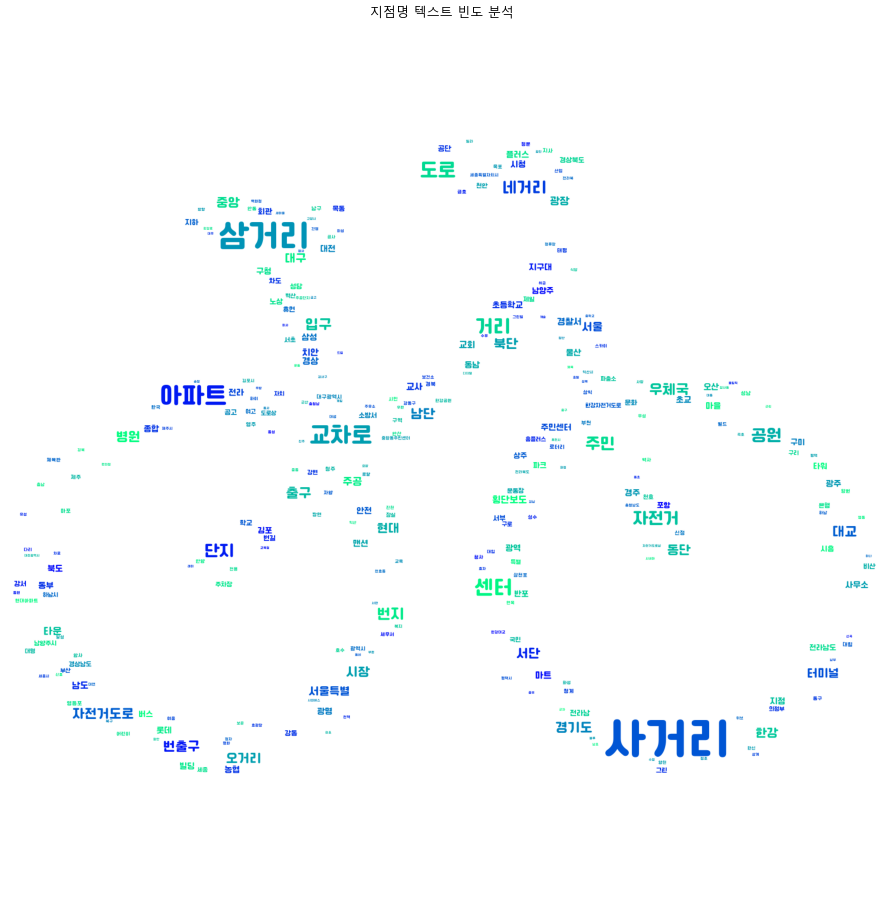

In [13]:
# 한글 워드크라우드
count_kor = Counter(word_list_kkma)
wordcloud_kor = wordcloud.generate_from_frequencies(count_kor)
fig_kor = plt.figure(figsize = (16, 16))

plt.imshow(wordcloud_kor)
plt.title("지점명 텍스트 빈도 분석", size = 13)
plt.axis('off')
plt.show()